# Lotka-Volterra Predator-Prey Simulation with Reinforcement Learning

This notebook implements the classic Lotka-Volterra predator-prey model and explores how reinforcement learning can be used to manage ecosystem dynamics. The simulation models the population dynamics between prey and predator species over time.

## Overview
- **Lotka-Volterra Model**: Mathematical model describing predator-prey population dynamics
- **Reinforcement Learning**: Agent learns to take actions to maintain population stability
- **Visualization**: Interactive plots to explore system behavior under different conditions

## 1. Import Required Libraries

First, let's import all the necessary libraries for our simulation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Lotka-Volterra Model

The Lotka-Volterra equations describe the dynamics of two species:
- **dx/dt = αx - βxy** (prey equation)
- **dy/dt = δxy - γy** (predator equation)

Where:
- x = prey population
- y = predator population
- α = prey growth rate
- β = predation rate
- δ = efficiency of turning prey into predators
- γ = predator death rate

In [2]:
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    """
    Lotka-Volterra differential equations
    
    Parameters:
    - state: [x, y] where x=prey, y=predator
    - t: time
    - alpha: prey growth rate
    - beta: predator effect on prey
    - delta: predator benefit from prey
    - gamma: predator mortality rate
    
    Returns:
    - [dx/dt, dy/dt]: rate of change for both populations
    """
    x, y = state
    dx = alpha * x - beta * x * y  # Prey growth
    dy = delta * x * y - gamma * y  # Predator growth
    return [dx, dy]

print("Lotka-Volterra function defined successfully!")

Lotka-Volterra function defined successfully!


## 3. Set Model Parameters and Initial Conditions

Now let's define the ecological parameters and initial population states:

In [3]:
parameters = {
    'alpha': 0.1,   # prey growth rate
    'beta': 0.02,   # predator effect on prey
    'delta': 0.01,  # predator benefit from prey
    'gamma': 0.1    # predator mortality rate
}

initial_state = [40, 9]  # initial number of [prey, predators]
times = np.linspace(0, 200, 201)  # time points

print(f"Parameters: {parameters}")
print(f"Initial state: {initial_state[0]} prey, {initial_state[1]} predators")
print(f"Time range: 0 to {times[-1]} with {len(times)} points")

Parameters: {'alpha': 0.1, 'beta': 0.02, 'delta': 0.01, 'gamma': 0.1}
Initial state: 40 prey, 9 predators
Time range: 0 to 200.0 with 201 points


## 4. Configure Reinforcement Learning Settings

Set up the RL environment for ecosystem management. The agent will learn to take actions to maintain population stability:

In [4]:
# RL parameters
learning_rate = 0.1      # Learning rate
discount_factor = 0.9    # Discount factor
epsilon = 0.1            # Exploration rate

# Discretize state space
prey_bins = np.arange(0, 151, 10)
predator_bins = np.arange(0, 151, 10)
num_prey_states = len(prey_bins)
num_predator_states = len(predator_bins)

# Action space
actions = ["do_nothing", "add_prey", "remove_predators"]
num_actions = len(actions)

# Initialize Q-table
q_table = np.zeros((num_prey_states, num_predator_states, num_actions))

print("RL settings initialized successfully!")
print(f"State space: {num_prey_states} x {num_predator_states} = {num_prey_states * num_predator_states} states")
print(f"Action space: {num_actions} actions")
print(f"Q-table dimensions: {q_table.shape}")
print(f"Available actions: {actions}")

RL settings initialized successfully!
State space: 16 x 16 = 256 states
Action space: 3 actions
Q-table dimensions: (16, 16, 3)
Available actions: ['do_nothing', 'add_prey', 'remove_predators']


## 5. Implement RL Helper Functions

These functions handle state discretization, action selection, and reward calculation:

In [5]:
def get_state_indices(prey_pop, predator_pop):
    """Function to discretize continuous state into bins"""
    prey_index = np.argmin(np.abs(prey_bins - prey_pop))
    predator_index = np.argmin(np.abs(predator_bins - predator_pop))
    return prey_index, predator_index

def choose_action(prey_index, predator_index, epsilon):
    """Function to choose action (epsilon-greedy)"""
    if random.random() < epsilon:
        # Explore: choose random action
        return random.randint(0, num_actions - 1)
    else:
        # Exploit: choose best action from Q-table
        q_values = q_table[prey_index, predator_index, :]
        return np.argmax(q_values)

def calculate_reward(prey_pop, predator_pop):
    """Function to calculate reward"""
    # Goal: maintain stable populations (both above minimum thresholds)
    min_prey = 5
    min_predators = 2
    
    if prey_pop < min_prey or predator_pop < min_predators:
        return -100  # Large penalty for extinction
    else:
        return 1     # Small reward for survival

print("RL helper functions defined successfully!")

RL helper functions defined successfully!


In [6]:
# Test the helper functions
print("Testing helper functions...")
test_indices = get_state_indices(40, 9)
print(f"State indices for (40, 9): {test_indices}")
test_action = choose_action(test_indices[0], test_indices[1], 0.5)
print(f"Random action chosen: {actions[test_action]}")
test_reward = calculate_reward(40, 9)
print(f"Reward for (40, 9): {test_reward}")

# Test edge cases
test_reward_extinction = calculate_reward(2, 1)
print(f"Reward for extinction scenario (2, 1): {test_reward_extinction}")

Testing helper functions...
State indices for (40, 9): (np.int64(4), np.int64(1))
Random action chosen: do_nothing
Reward for (40, 9): 1
Reward for extinction scenario (2, 1): -100


## 6. Run Basic Lotka-Volterra Simulation

Let's run the basic simulation without RL intervention to see the natural dynamics:

In [7]:
print("Running basic Lotka-Volterra simulation...")
solution = odeint(lotka_volterra, initial_state, times, args=(
    parameters['alpha'], parameters['beta'], 
    parameters['delta'], parameters['gamma']
))

print(f"Simulation completed!")
print(f"Final populations: {solution[-1][0]:.1f} prey, {solution[-1][1]:.1f} predators")
print(f"Max prey population: {np.max(solution[:, 0]):.1f}")
print(f"Max predator population: {np.max(solution[:, 1]):.1f}")
print(f"Min prey population: {np.min(solution[:, 0]):.1f}")
print(f"Min predator population: {np.min(solution[:, 1]):.1f}")

Running basic Lotka-Volterra simulation...
Simulation completed!
Final populations: 0.9 prey, 2.1 predators
Max prey population: 42.8
Max predator population: 21.4
Min prey population: 0.6
Min predator population: 0.3


## 7. Visualize Population Dynamics

Create comprehensive visualizations of the population dynamics:

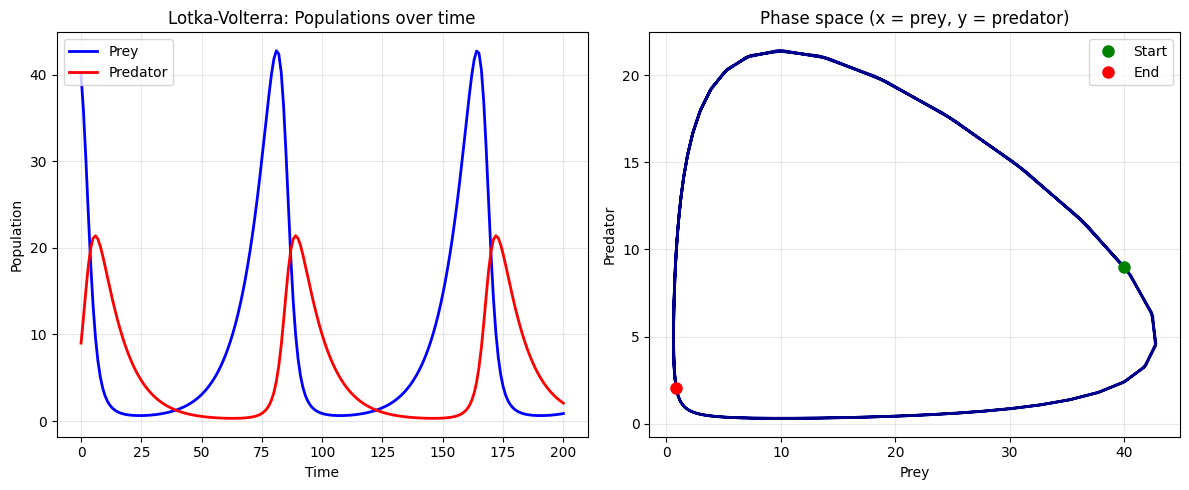

In [8]:
# Create the visualization
plt.figure(figsize=(12, 5))

# 1. Populations over time
plt.subplot(1, 2, 1)
plt.plot(times, solution[:, 0], 'b-', label='Prey', linewidth=2)
plt.plot(times, solution[:, 1], 'r-', label='Predator', linewidth=2)
plt.title('Lotka-Volterra: Populations over time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Phase space
plt.subplot(1, 2, 2)
plt.plot(solution[:, 0], solution[:, 1], 'darkblue', linewidth=2)
plt.plot(initial_state[0], initial_state[1], 'go', markersize=8, label='Start')
plt.plot(solution[-1, 0], solution[-1, 1], 'ro', markersize=8, label='End')
plt.title('Phase space (x = prey, y = predator)')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Perform Parameter Sensitivity Analysis

Explore how different parameter values affect the system dynamics:

In [9]:
print("Running parameter sensitivity analysis...")
alpha_values = [0.05, 0.1, 0.15, 0.2]
sensitivity_results = []

for alpha_val in alpha_values:
    temp_params = parameters.copy()
    temp_params['alpha'] = alpha_val
    
    temp_solution = odeint(lotka_volterra, initial_state, times, args=(
        temp_params['alpha'], temp_params['beta'], 
        temp_params['delta'], temp_params['gamma']
    ))
    sensitivity_results.append((alpha_val, temp_solution))

print(f"Analyzed {len(alpha_values)} different alpha values")

Running parameter sensitivity analysis...
Analyzed 4 different alpha values


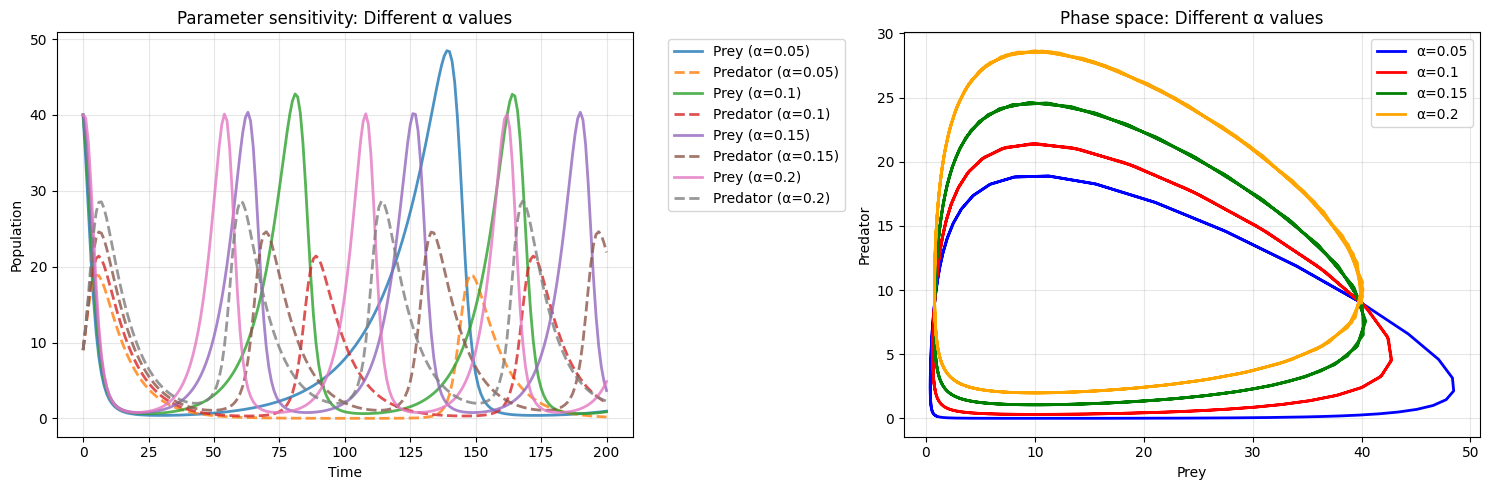

In [10]:
# Visualize parameter sensitivity
plt.figure(figsize=(15, 5))

# Plot 1: Population dynamics for different alpha values
plt.subplot(1, 2, 1)
for alpha_val, sol in sensitivity_results:
    plt.plot(times, sol[:, 0], label=f'Prey (α={alpha_val})', linestyle='-', alpha=0.8, linewidth=2)
    plt.plot(times, sol[:, 1], label=f'Predator (α={alpha_val})', linestyle='--', alpha=0.8, linewidth=2)

plt.title('Parameter sensitivity: Different α values')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Phase space for different alpha values
plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green', 'orange']
for i, (alpha_val, sol) in enumerate(sensitivity_results):
    plt.plot(sol[:, 0], sol[:, 1], color=colors[i], linewidth=2, 
             label=f'α={alpha_val}')

plt.title('Phase space: Different α values')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Analyze Different Initial Conditions

Explore how different starting populations affect the system trajectory:

In [11]:
print("Running initial conditions analysis...")
initial_conditions = [
    [20, 5],
    [40, 9],   # original values
    [60, 15],
    [30, 20]
]

initial_results = []
for init_cond in initial_conditions:
    temp_solution = odeint(lotka_volterra, init_cond, times, args=(
        parameters['alpha'], parameters['beta'], 
        parameters['delta'], parameters['gamma']
    ))
    initial_results.append((init_cond, temp_solution))

print(f"Analyzed {len(initial_conditions)} different initial conditions")

Running initial conditions analysis...
Analyzed 4 different initial conditions


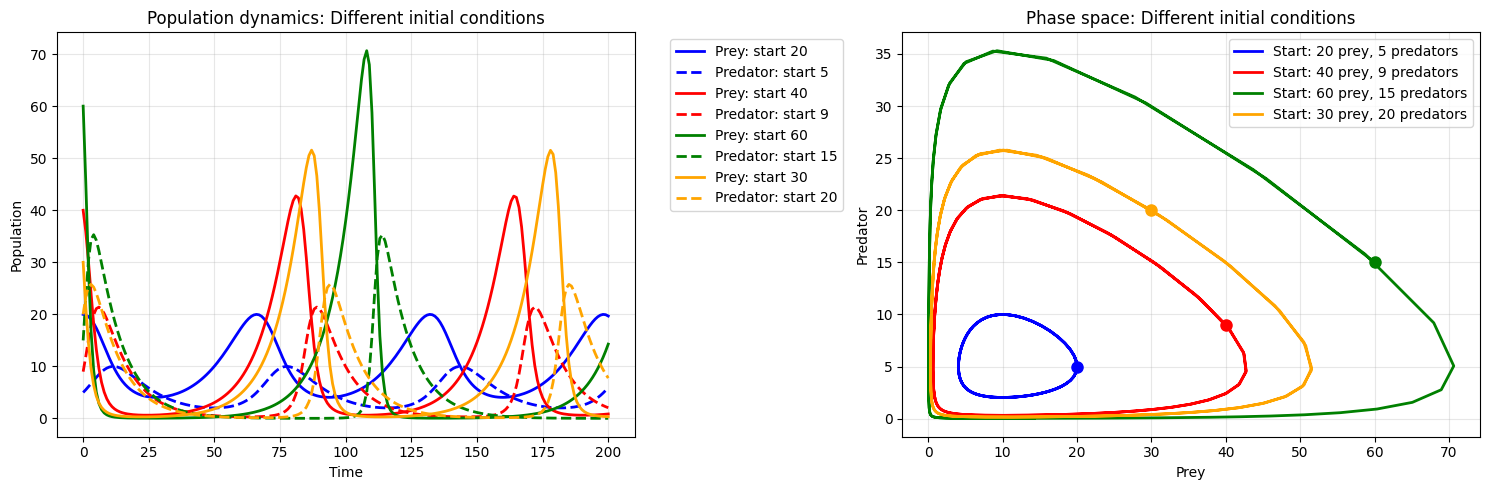


Basic simulation completed successfully!
Next step: Add RL training loop...


In [12]:
# Visualize different initial conditions
plt.figure(figsize=(15, 5))

# Plot 1: Population dynamics over time
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green', 'orange']
for i, (init_cond, sol) in enumerate(initial_results):
    plt.plot(times, sol[:, 0], color=colors[i], linestyle='-', linewidth=2, 
             label=f'Prey: start {init_cond[0]}')
    plt.plot(times, sol[:, 1], color=colors[i], linestyle='--', linewidth=2, 
             label=f'Predator: start {init_cond[1]}')

plt.title('Population dynamics: Different initial conditions')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Phase space trajectories
plt.subplot(1, 2, 2)
for i, (init_cond, sol) in enumerate(initial_results):
    plt.plot(sol[:, 0], sol[:, 1], color=colors[i], linewidth=2, 
             label=f'Start: {init_cond[0]} prey, {init_cond[1]} predators')
    plt.plot(init_cond[0], init_cond[1], 'o', color=colors[i], markersize=8)

plt.title('Phase space: Different initial conditions')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBasic simulation completed successfully!")
print("Next step: Add RL training loop...")

## 10. Implement Action Functions

Define how the agent's actions affect the ecosystem populations:

In [18]:
def apply_action(current_state, action_index, verbose=False):
    if verbose:
        print("Printing action index:", action_index)
    """
    Apply the chosen action to modify the population state
    
    Parameters:
    - current_state: [prey, predator] current populations
    - action_index: 0=do_nothing, 1=add_prey, 2=remove_predators
    - verbose: whether to print action details
    
    Returns:
    - new_state: [prey, predator] after action
    """
    prey, predator = current_state
    
    if action_index == 0:  # do_nothing
        if verbose:
            print(f"    Action: Do nothing - populations stay at [{prey:.1f}, {predator:.1f}]")
        return [prey, predator]
    
    elif action_index == 1:  # add_prey
        new_prey = prey + 5  # Add 5 prey
        if verbose:
            print(f"    Action: Add prey - {prey:.1f} → {new_prey:.1f} prey")
        return [new_prey, predator]
    
    elif action_index == 2:  # remove_predators
        new_predator = max(predator - 2, 0)  # Remove 2 predators (don't go below 0)
        if verbose:
            print(f"    Action: Remove predators - {predator:.1f} → {new_predator:.1f} predators")
        return [prey, new_predator]
    
    else:
        if verbose:
            print(f"    ERROR: Unknown action {action_index}")
        return current_state

print("Action implementation function defined!")

# Test the function
print("\nTesting apply_action function:")
test_state = [25, 8]
for i, action_name in enumerate(actions):
    print(f"Test action {i} ({action_name}):")
    result = apply_action(test_state, i, verbose=True)  # Test with verbose=True
    print(f"  Result: {result}")
    print()

Action implementation function defined!

Testing apply_action function:
Test action 0 (do_nothing):
Printing action index: 0
    Action: Do nothing - populations stay at [25.0, 8.0]
  Result: [25, 8]

Test action 1 (add_prey):
Printing action index: 1
    Action: Add prey - 25.0 → 30.0 prey
  Result: [30, 8]

Test action 2 (remove_predators):
Printing action index: 2
    Action: Remove predators - 8.0 → 6.0 predators
  Result: [25, 6]



## 11. Implement Q-Learning Update

Create the Q-table update mechanism using the Q-learning formula:

In [19]:
def update_q_table(old_state_indices, action, reward, new_state_indices, learning_rate, discount_factor, verbose=False):
    """
    Update Q-table using Q-learning formula:
    Q(s,a) = Q(s,a) + α[r + γ*max(Q(s',a')) - Q(s,a)]
    
    Parameters:
    - old_state_indices: (prey_idx, pred_idx) before action
    - action: action index that was taken
    - reward: reward received
    - new_state_indices: (prey_idx, pred_idx) after action
    - learning_rate: α (alpha) 
    - discount_factor: γ (gamma)
    - verbose: whether to print update details
    """
    old_prey_idx, old_pred_idx = old_state_indices
    new_prey_idx, new_pred_idx = new_state_indices
    
    # Current Q-value
    old_q_value = q_table[old_prey_idx, old_pred_idx, action]
    
    # Best future Q-value (max over all actions in new state)
    max_future_q = np.max(q_table[new_prey_idx, new_pred_idx, :])
    
    # Q-learning update formula
    new_q_value = old_q_value + learning_rate * (reward + discount_factor * max_future_q - old_q_value)
    
    # Update the Q-table
    q_table[old_prey_idx, old_pred_idx, action] = new_q_value
    
    if verbose:
        print(f"    Q-update: Q[{old_state_indices}][{action}]: {old_q_value:.3f} → {new_q_value:.3f}")
        print(f"    Formula: {old_q_value:.3f} + {learning_rate}*({reward} + {discount_factor}*{max_future_q:.3f} - {old_q_value:.3f})")

print("Q-table update function defined!")

# Test with dummy values
print("\nTesting Q-table update:")
print("Before update:", q_table[4, 1, 1])
update_q_table((4, 1), 1, -100, (3, 1), learning_rate, discount_factor)
print("After update:", q_table[4, 1, 1])

# Test action 2 with positive reward
print("\nTesting action 2 (remove_predators) with positive reward:")
print("Before update:", q_table[5, 2, 2])
update_q_table((5, 2), 2, 50, (4, 2), learning_rate, discount_factor)
print("After update:", q_table[5, 2, 2])

Q-table update function defined!

Testing Q-table update:
Before update: -10.0
After update: -19.0

Testing action 2 (remove_predators) with positive reward:
Before update: 5.0
After update: 9.5


## 12. Reinforcement Learning Training Loop

Implementing a basic reinforcement learning training loop. The agent learns to make decisions that affect population dynamics through trial and error.
The training runs for a small number of episodes (5), with each episode consisting of up to 10 steps.
At each step, the agent:

- Observes the current state (prey and predator populations)
- Chooses an action using an epsilon-greedy strategy
- Applies the action to update the environment
- Receives a reward based on the new state
- Updates its Q-table to learn from the experience

Rewards are tracked over time to monitor learning progress, with special handling for extinction events (reward of -100) that end episodes early. This represents a typical Q-learning approach where the agent gradually learns which actions lead to better outcomes in different states of the ecosystem.

=== STARTING RL TRAINING ===
Training parameters:
  Learning rate: 0.1
  Discount factor: 0.9
  Epsilon (exploration): 0.1

--- EPISODE 1 ---
Starting state: 40.0 prey, 9.0 predators

  Step 1:
    Current state indices: (np.int64(4), np.int64(1))
    Chosen action: 0 (do_nothing)
Printing action index: 0
    Action: Do nothing - populations stay at [40.0, 9.0]
    Reward: 1
    New state indices: (np.int64(4), np.int64(1))
    Q-update: Q[(np.int64(4), np.int64(1))][0]: 0.956 → 1.047
    Formula: 0.956 + 0.1*(1 + 0.9*0.956 - 0.956)
    Step summary: State [40.0, 9.0], Step reward: 1

  Step 2:
    Current state indices: (np.int64(4), np.int64(1))
    Chosen action: 0 (do_nothing)
Printing action index: 0
    Action: Do nothing - populations stay at [40.0, 9.0]
    Reward: 1
    New state indices: (np.int64(4), np.int64(1))
    Q-update: Q[(np.int64(4), np.int64(1))][0]: 1.047 → 1.136
    Formula: 1.047 + 0.1*(1 + 0.9*1.047 - 1.047)
    Step summary: State [40.0, 9.0], Step reward: 1



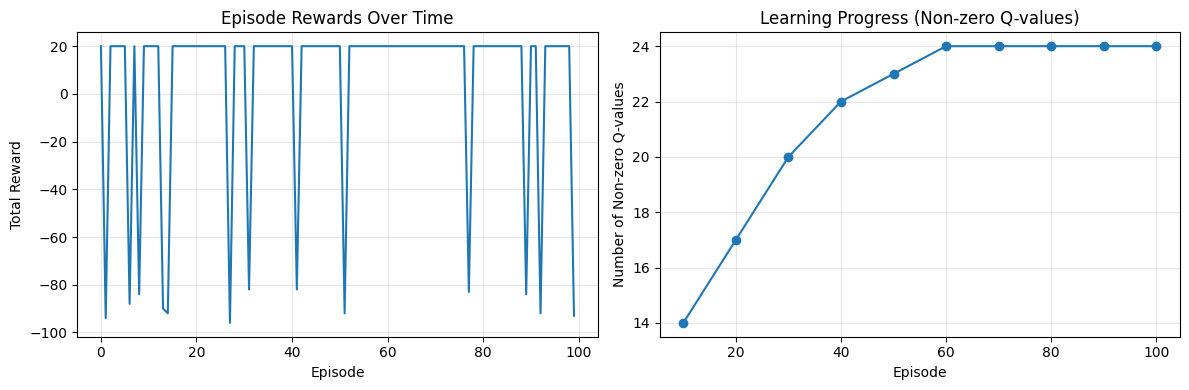

In [20]:
# Simple training loop - let's start with just a few episodes
print("=== STARTING RL TRAINING ===")
print(f"Training parameters:")
print(f"  Learning rate: {learning_rate}")
print(f"  Discount factor: {discount_factor}")
print(f"  Epsilon (exploration): {epsilon}")
print()

# Training settings - Enhanced for better learning
num_episodes = 100  # Much more substantial training
max_steps_per_episode = 20  # Longer episodes for more learning opportunities

# Diverse starting states for better exploration
starting_states = [
    [20, 5],   # Low populations - crisis scenario
    [40, 9],   # Medium populations - original state
    [60, 15],  # High populations - abundance scenario
    [10, 3],   # Very low populations - near extinction
    [80, 20]   # Very high populations - overpopulation
]

total_rewards = []  # Track performance
learning_progress = []  # Track Q-values over time to see learning

for episode in range(num_episodes):
    # Show progress every 10 episodes
    show_details = (episode + 1) % 10 == 0 or episode < 5
    
    if show_details:
        print(f"--- EPISODE {episode + 1} ---")
    
    # Reset environment for new episode - random starting state
    current_state = random.choice(starting_states).copy()
    episode_reward = 0
    
    if show_details:
        print(f"Starting state: {current_state[0]:.1f} prey, {current_state[1]:.1f} predators")
    
    for step in range(max_steps_per_episode):
        if show_details:
            print(f"\n  Step {step + 1}:")
        
        # 1. Get current state indices
        state_indices = get_state_indices(current_state[0], current_state[1])
        if show_details:
            print(f"    Current state indices: {state_indices}")
        
        # 2. Choose action
        action = choose_action(state_indices[0], state_indices[1], epsilon)
        action_name = actions[action]
        if show_details:
            print(f"    Chosen action: {action} ({action_name})")
        
        # 3. Apply action
        new_state = apply_action(current_state, action, verbose=show_details)
        
        # 4. Calculate reward
        reward = calculate_reward(new_state[0], new_state[1])
        if show_details:
            print(f"    Reward: {reward}")
        
        # 5. Get new state indices
        new_state_indices = get_state_indices(new_state[0], new_state[1])
        if show_details:
            print(f"    New state indices: {new_state_indices}")
        
        # 6. Update Q-table
        update_q_table(state_indices, action, reward, new_state_indices, learning_rate, discount_factor, verbose=show_details)
        
        # 7. Update for next iteration
        current_state = new_state
        episode_reward += reward
        
        if show_details:
            print(f"    Step summary: State [{current_state[0]:.1f}, {current_state[1]:.1f}], Step reward: {reward}")
        
        # Stop episode early if extinction occurs
        if reward == -100:
            if show_details:
                print(f"    EXTINCTION! Ending episode early.")
            break
    
    total_rewards.append(episode_reward)
    
    # Track learning progress every 10 episodes
    if (episode + 1) % 10 == 0:
        non_zero_q = np.count_nonzero(q_table)
        learning_progress.append(non_zero_q)
        print(f"Episode {episode + 1}: Reward = {episode_reward}, Non-zero Q-values = {non_zero_q}")
    
    if show_details:
        print(f"\nEpisode {episode + 1} finished. Total reward: {episode_reward}")
        print(f"Final state: {current_state[0]:.1f} prey, {current_state[1]:.1f} predators")
        print("-" * 50)

print(f"\n=== TRAINING COMPLETE ===")
print(f"Final episode rewards: {total_rewards[-10:]}")  # Show last 10
print(f"Average reward (all episodes): {np.mean(total_rewards):.1f}")
print(f"Average reward (last 20 episodes): {np.mean(total_rewards[-20:]):.1f}")
print(f"Learning progress (non-zero Q-values): {learning_progress}")

# Plot learning progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(total_rewards)
plt.title('Episode Rewards Over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
episode_markers = list(range(10, num_episodes + 1, 10))
plt.plot(episode_markers, learning_progress, 'o-')
plt.title('Learning Progress (Non-zero Q-values)')
plt.xlabel('Episode')
plt.ylabel('Number of Non-zero Q-values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Q-Table Analysis and Learned Policy Inspection

This code examines what the reinforcement learning agent has learned by inspecting its Q-table after training. It analyzes the agent's learned policy by checking Q-values for several representative ecosystem states.

In [16]:
# Let's inspect the Q-table to see what the agent learned
print("=== Q-TABLE INSPECTION ===")

# Check a few key states to see what the agent learned
test_states = [
    (40, 9),   # Initial state
    (20, 5),   # Lower populations
    (80, 20),  # Higher populations
    (10, 3),   # Risky state
    (60, 15)   # Abundant state
]

for prey_pop, pred_pop in test_states:
    prey_idx, pred_idx = get_state_indices(prey_pop, pred_pop)
    q_values = q_table[prey_idx, pred_idx, :]
    
    print(f"\nState: {prey_pop} prey, {pred_pop} predators (indices: {prey_idx}, {pred_idx})")
    print(f"Q-values: {q_values}")
    
    # Find best action
    best_action = np.argmax(q_values)
    best_q_value = q_values[best_action]
    
    print(f"Best action: {best_action} ({actions[best_action]}) with Q-value: {best_q_value:.3f}")
    
    # Show all actions
    for i, (action_name, q_val) in enumerate(zip(actions, q_values)):
        marker = " ←BEST" if i == best_action else ""
        print(f"  {action_name}: {q_val:.3f}{marker}")

print(f"\n=== SUMMARY ===")
print(f"Non-zero Q-values in table: {np.count_nonzero(q_table)}")
print(f"Min Q-value: {np.min(q_table):.3f}")
print(f"Max Q-value: {np.max(q_table):.3f}")
print(f"Mean Q-value: {np.mean(q_table):.3f}")

=== Q-TABLE INSPECTION ===

State: 40 prey, 9 predators (indices: 4, 1)
Q-values: [  0.95617925 -10.           0.        ]
Best action: 0 (do_nothing) with Q-value: 0.956
  do_nothing: 0.956 ←BEST
  add_prey: -10.000
  remove_predators: 0.000

State: 20 prey, 5 predators (indices: 2, 0)
Q-values: [0.95617925 0.         0.        ]
Best action: 0 (do_nothing) with Q-value: 0.956
  do_nothing: 0.956 ←BEST
  add_prey: 0.000
  remove_predators: 0.000

State: 80 prey, 20 predators (indices: 8, 2)
Q-values: [0.   0.19 0.  ]
Best action: 1 (add_prey) with Q-value: 0.190
  do_nothing: 0.000
  add_prey: 0.190 ←BEST
  remove_predators: 0.000

State: 10 prey, 3 predators (indices: 1, 0)
Q-values: [ 0.4900995   0.         -9.95589104]
Best action: 0 (do_nothing) with Q-value: 0.490
  do_nothing: 0.490 ←BEST
  add_prey: 0.000
  remove_predators: -9.956

State: 60 prey, 15 predators (indices: 6, 1)
Q-values: [0.86482753 0.1267309  0.        ]
Best action: 0 (do_nothing) with Q-value: 0.865
  do_noth

## 14. Agent Performance Comparison Study

Now that we have a trained RL agent, let's compare its performance against two baseline approaches:

1. **No Intervention**: Natural Lotka-Volterra dynamics (baseline)
2. **Random Agent**: Takes random actions at each step 
3. **Trained RL Agent**: Uses the learned Q-table to make smart decisions

This comparison will demonstrate the value of reinforcement learning for ecosystem management by showing how the trained agent performs compared to random actions and natural evolution.

In [21]:
def simulate_scenario(scenario_type, initial_state, num_steps, verbose=False):
    """
    Simulate ecosystem management under different approaches
    
    Parameters:
    - scenario_type: 'no_intervention', 'random_agent', or 'rl_agent'
    - initial_state: starting [prey, predator] populations
    - num_steps: number of management steps to simulate
    - verbose: whether to print step details
    
    Returns:
    - trajectory: list of [prey, predator] states over time
    - total_reward: cumulative reward received
    - survival_steps: number of steps before extinction (or num_steps if survived)
    """
    trajectory = [initial_state.copy()]
    current_state = initial_state.copy()
    total_reward = 0
    survival_steps = 0
    
    if verbose:
        print(f"\n=== {scenario_type.upper().replace('_', ' ')} SIMULATION ===")
        print(f"Starting state: {current_state[0]:.1f} prey, {current_state[1]:.1f} predators")
    
    for step in range(num_steps):
        if scenario_type == 'no_intervention':
            # No action taken - populations stay the same for this step
            action = 0  # do_nothing
            
        elif scenario_type == 'random_agent':
            # Choose random action
            action = random.randint(0, num_actions - 1)
            
        elif scenario_type == 'rl_agent':
            # Use trained Q-table to choose action
            state_indices = get_state_indices(current_state[0], current_state[1])
            # Use pure exploitation (epsilon=0) for testing
            q_values = q_table[state_indices[0], state_indices[1], :]
            action = np.argmax(q_values)
        
        # Apply the chosen action
        if scenario_type != 'no_intervention':
            new_state = apply_action(current_state, action, verbose=False)
        else:
            new_state = current_state.copy()  # No intervention
        
        # Calculate reward and check for extinction
        reward = calculate_reward(new_state[0], new_state[1])
        total_reward += reward
        
        current_state = new_state
        trajectory.append(current_state.copy())
        
        if verbose:
            action_name = actions[action] if scenario_type != 'no_intervention' else 'no_action'
            print(f"Step {step+1}: Action={action_name}, State=[{current_state[0]:.1f}, {current_state[1]:.1f}], Reward={reward}")
        
        # Check for extinction
        if reward == -100:
            survival_steps = step + 1
            if verbose:
                print(f"EXTINCTION at step {step+1}!")
            break
        else:
            survival_steps = step + 1
    
    if verbose:
        print(f"Final result: Total reward = {total_reward}, Survived {survival_steps}/{num_steps} steps")
    
    return trajectory, total_reward, survival_steps

print("Scenario simulation function defined!")

# Test scenarios - we'll compare all three approaches
test_scenarios = [
    [20, 5],   # Crisis scenario
    [40, 9],   # Medium populations  
    [60, 15],  # High populations
    [10, 3],   # Near extinction
]

num_test_steps = 30  # Longer test to see differences

print(f"Ready to test {len(test_scenarios)} scenarios with {num_test_steps} steps each")

Scenario simulation function defined!
Ready to test 4 scenarios with 30 steps each


In [22]:
# Run comprehensive comparison study
print("=== COMPREHENSIVE AGENT COMPARISON ===")

comparison_results = []
scenario_types = ['no_intervention', 'random_agent', 'rl_agent']

for i, initial_state in enumerate(test_scenarios):
    print(f"\n--- SCENARIO {i+1}: Starting with {initial_state[0]} prey, {initial_state[1]} predators ---")
    
    scenario_results = {}
    
    for scenario_type in scenario_types:
        trajectory, total_reward, survival_steps = simulate_scenario(
            scenario_type, initial_state, num_test_steps, verbose=False
        )
        
        scenario_results[scenario_type] = {
            'trajectory': trajectory,
            'total_reward': total_reward,
            'survival_steps': survival_steps,
            'final_state': trajectory[-1]
        }
        
        print(f"  {scenario_type.replace('_', ' ').title()}: "
              f"Reward={total_reward:3d}, Survived={survival_steps:2d}/{num_test_steps}, "
              f"Final=[{trajectory[-1][0]:.1f}, {trajectory[-1][1]:.1f}]")
    
    comparison_results.append({
        'initial_state': initial_state,
        'results': scenario_results
    })

print(f"\n=== SUMMARY STATISTICS ===")

# Calculate averages across all scenarios
avg_rewards = {scenario_type: 0 for scenario_type in scenario_types}
avg_survival = {scenario_type: 0 for scenario_type in scenario_types}
extinction_count = {scenario_type: 0 for scenario_type in scenario_types}

for result in comparison_results:
    for scenario_type in scenario_types:
        avg_rewards[scenario_type] += result['results'][scenario_type]['total_reward']
        avg_survival[scenario_type] += result['results'][scenario_type]['survival_steps']
        if result['results'][scenario_type]['survival_steps'] < num_test_steps:
            extinction_count[scenario_type] += 1

num_scenarios = len(comparison_results)

print(f"Average Performance Across {num_scenarios} Test Scenarios:")
for scenario_type in scenario_types:
    avg_reward = avg_rewards[scenario_type] / num_scenarios
    avg_surv = avg_survival[scenario_type] / num_scenarios
    extinctions = extinction_count[scenario_type]
    
    print(f"  {scenario_type.replace('_', ' ').title():15}: "
          f"Avg Reward = {avg_reward:6.1f}, "
          f"Avg Survival = {avg_surv:4.1f}/{num_test_steps}, "
          f"Extinctions = {extinctions}/{num_scenarios}")

print(f"\nComparison completed! Results ready for visualization.")

=== COMPREHENSIVE AGENT COMPARISON ===

--- SCENARIO 1: Starting with 20 prey, 5 predators ---
  No Intervention: Reward= 30, Survived=30/30, Final=[20.0, 5.0]
  Random Agent: Reward=-87, Survived=14/30, Final=[60.0, 1.0]
  Rl Agent: Reward= 30, Survived=30/30, Final=[20.0, 5.0]

--- SCENARIO 2: Starting with 40 prey, 9 predators ---
  No Intervention: Reward= 30, Survived=30/30, Final=[40.0, 9.0]
  Random Agent: Reward=-93, Survived= 8/30, Final=[55.0, 1.0]
  Rl Agent: Reward= 30, Survived=30/30, Final=[40.0, 9.0]

--- SCENARIO 3: Starting with 60 prey, 15 predators ---
  No Intervention: Reward= 30, Survived=30/30, Final=[60.0, 15.0]
  Random Agent: Reward=-72, Survived=29/30, Final=[130.0, 1.0]
  Rl Agent: Reward= 30, Survived=30/30, Final=[60.0, 15.0]

--- SCENARIO 4: Starting with 10 prey, 3 predators ---
  No Intervention: Reward= 30, Survived=30/30, Final=[10.0, 3.0]
  Random Agent: Reward=-100, Survived= 1/30, Final=[10.0, 1.0]
  Rl Agent: Reward= 30, Survived=30/30, Final=[10.

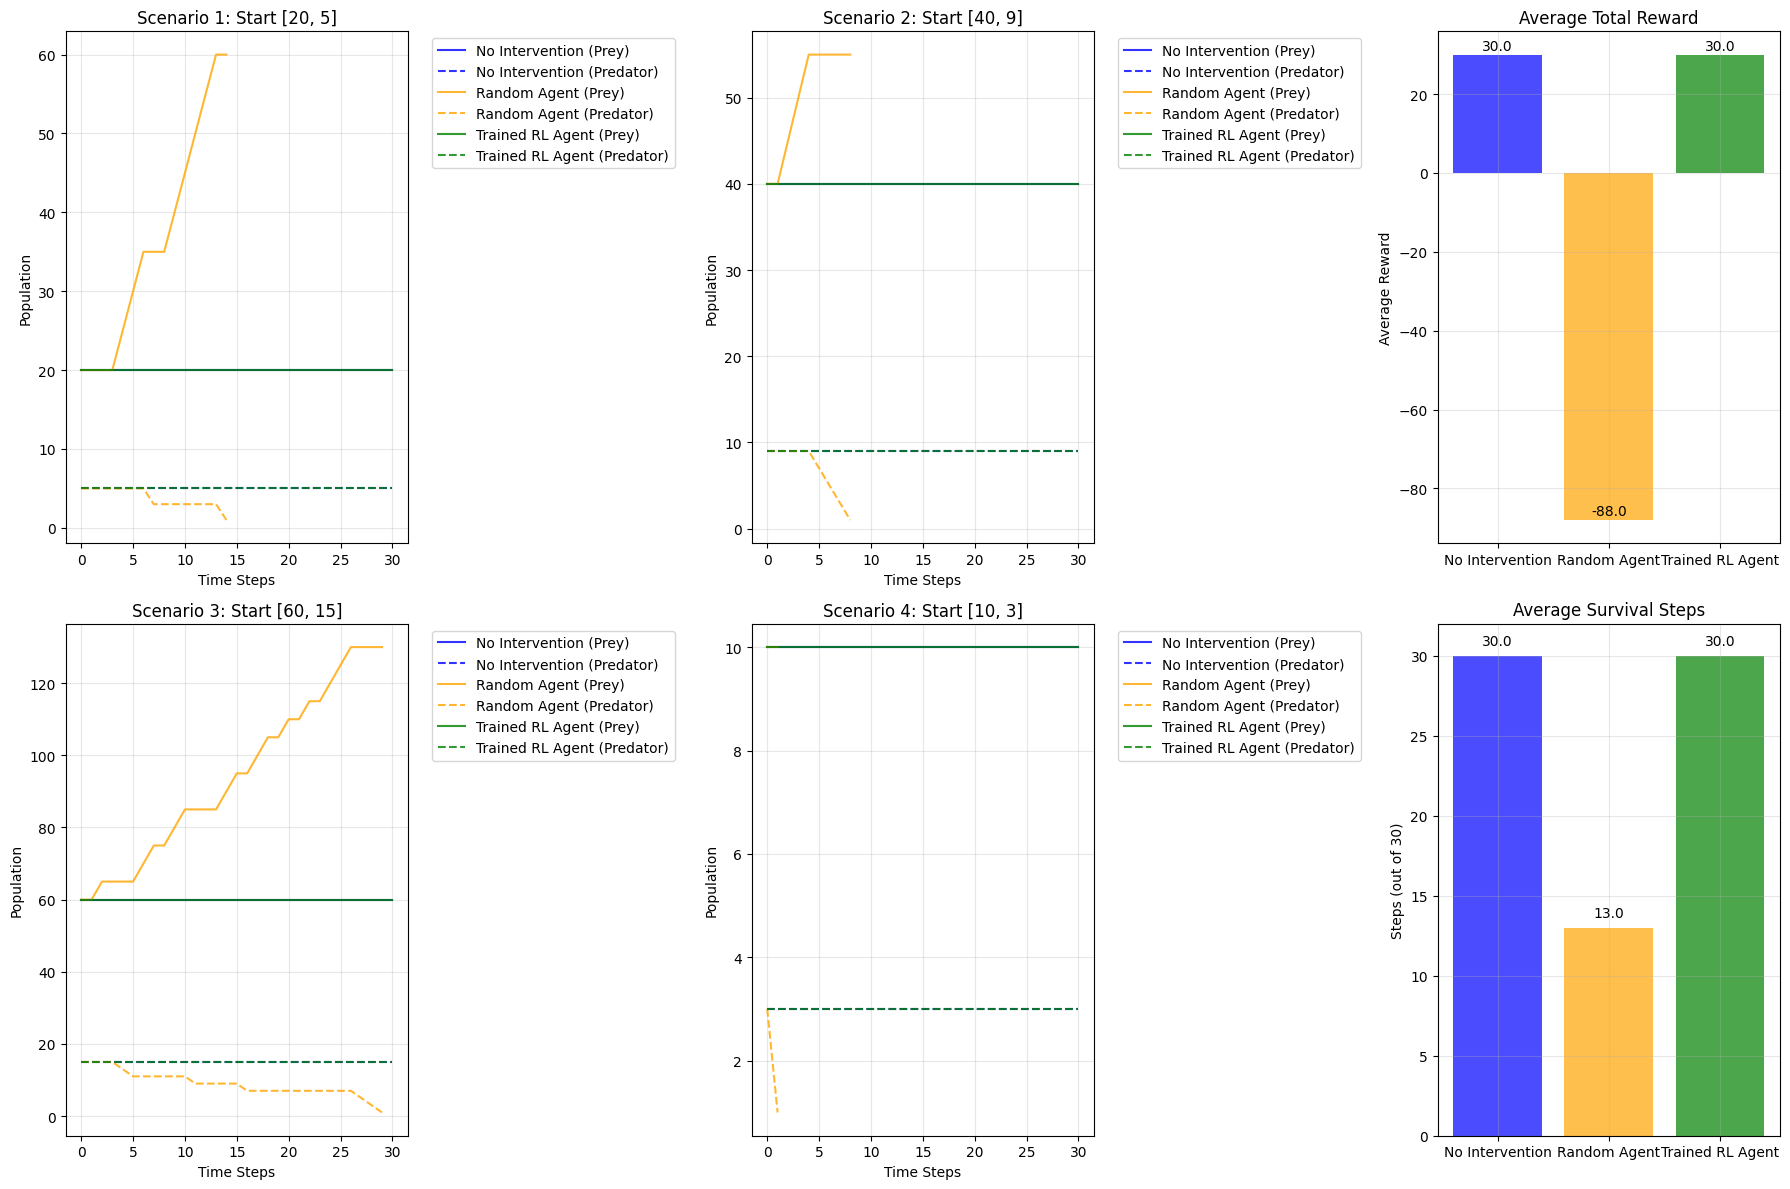


DETAILED COMPARISON TABLE

Scenario 1 - Starting State: [20, 5]
------------------------------------------------------------
Approach        Total Reward Survival   Final State    
------------------------------------------------------------
No Intervention 30           30/30      [20.0, 5.0]    
Random Agent    -87          14/30      [60.0, 1.0]    
Trained RL Agent 30           30/30      [20.0, 5.0]    

Scenario 2 - Starting State: [40, 9]
------------------------------------------------------------
Approach        Total Reward Survival   Final State    
------------------------------------------------------------
No Intervention 30           30/30      [40.0, 9.0]    
Random Agent    -93          8/30       [55.0, 1.0]    
Trained RL Agent 30           30/30      [40.0, 9.0]    

Scenario 3 - Starting State: [60, 15]
------------------------------------------------------------
Approach        Total Reward Survival   Final State    
-----------------------------------------------

In [23]:
# Create comprehensive visualization of comparison results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

colors = ['blue', 'orange', 'green']
scenario_labels = ['No Intervention', 'Random Agent', 'Trained RL Agent']

# Plot 1: Population trajectories for each test scenario
for i, result in enumerate(comparison_results):
    row = i // 2
    col = i % 2
    if i < 4:  # We have 4 test scenarios
        ax = axes[row, col] if row < 2 else axes[1, col]
        
        initial_state = result['initial_state']
        ax.set_title(f'Scenario {i+1}: Start [{initial_state[0]}, {initial_state[1]}]')
        
        for j, scenario_type in enumerate(scenario_types):
            trajectory = result['results'][scenario_type]['trajectory']
            prey_pop = [state[0] for state in trajectory]
            predator_pop = [state[1] for state in trajectory]
            
            ax.plot(prey_pop, label=f'{scenario_labels[j]} (Prey)', 
                   color=colors[j], linestyle='-', alpha=0.8)
            ax.plot(predator_pop, label=f'{scenario_labels[j]} (Predator)', 
                   color=colors[j], linestyle='--', alpha=0.8)
        
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Population')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)

# Plot 2: Performance comparison bar charts
ax_rewards = axes[0, 2]
ax_survival = axes[1, 2]

# Rewards comparison
reward_values = [avg_rewards[scenario_type] / num_scenarios for scenario_type in scenario_types]
bars1 = ax_rewards.bar(scenario_labels, reward_values, color=colors, alpha=0.7)
ax_rewards.set_title('Average Total Reward')
ax_rewards.set_ylabel('Average Reward')
ax_rewards.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, reward_values):
    height = bar.get_height()
    ax_rewards.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{value:.1f}', ha='center', va='bottom')

# Survival comparison
survival_values = [avg_survival[scenario_type] / num_scenarios for scenario_type in scenario_types]
bars2 = ax_survival.bar(scenario_labels, survival_values, color=colors, alpha=0.7)
ax_survival.set_title('Average Survival Steps')
ax_survival.set_ylabel(f'Steps (out of {num_test_steps})')
ax_survival.set_ylim(0, num_test_steps + 2)
ax_survival.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, survival_values):
    height = bar.get_height()
    ax_survival.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed comparison table
print("\n" + "="*80)
print("DETAILED COMPARISON TABLE")
print("="*80)

for i, result in enumerate(comparison_results):
    initial_state = result['initial_state']
    print(f"\nScenario {i+1} - Starting State: [{initial_state[0]}, {initial_state[1]}]")
    print("-" * 60)
    print(f"{'Approach':<15} {'Total Reward':<12} {'Survival':<10} {'Final State':<15}")
    print("-" * 60)
    
    for scenario_type in scenario_types:
        data = result['results'][scenario_type]
        final_state = data['final_state']
        survival_str = f"{data['survival_steps']}/{num_test_steps}"
        final_state_str = f"[{final_state[0]:.1f}, {final_state[1]:.1f}]"
        
        print(f"{scenario_labels[scenario_types.index(scenario_type)]:<15} "
              f"{data['total_reward']:<12} "
              f"{survival_str:<10} "
              f"{final_state_str:<15}")

print("\n" + "="*80)
print("CONCLUSION: Does the RL agent outperform random and natural approaches?")
print("="*80)

## 15. Testing on Unstable Scenarios - Forcing Active Management

The previous results showed our agent learned a conservative "do nothing" strategy because the test scenarios were naturally stable. Let's test the agent on **crisis scenarios** where doing nothing leads to extinction, forcing it to take active management actions.

We'll create scenarios where:
- **Predator populations are dangerously low** (extinction risk)
- **Prey populations are critically low** (extinction risk)  
- **Both populations are in crisis** (double extinction risk)

This will demonstrate whether the agent can learn **active intervention strategies** when conservative approaches fail.

In [24]:
# Define unstable crisis scenarios where "do nothing" leads to extinction
crisis_scenarios = [
    [8, 1],    # Crisis: Very low populations - both near extinction thresholds
    [15, 1],   # Crisis: Low predators - predator extinction risk 
    [3, 4],    # Crisis: Low prey - prey extinction risk
    [6, 2],    # Crisis: Both populations dangerously low
    [4, 1]     # Crisis: Extreme crisis - both populations critical
]

print("=== CRISIS SCENARIOS TEST ===")
print("Testing scenarios where 'do nothing' likely leads to extinction")
print("This will show if the agent can learn active management strategies!")
print()

crisis_results = []
num_crisis_steps = 25  # Shorter test - these scenarios are critical

for i, initial_state in enumerate(crisis_scenarios):
    print(f"--- CRISIS {i+1}: Starting with {initial_state[0]} prey, {initial_state[1]} predators ---")
    
    crisis_scenario_results = {}
    
    for scenario_type in scenario_types:
        trajectory, total_reward, survival_steps = simulate_scenario(
            scenario_type, initial_state, num_crisis_steps, verbose=False
        )
        
        crisis_scenario_results[scenario_type] = {
            'trajectory': trajectory,
            'total_reward': total_reward,
            'survival_steps': survival_steps,
            'final_state': trajectory[-1]
        }
        
        # Add status indicator
        status = "SURVIVED" if survival_steps == num_crisis_steps else "EXTINCT"
        print(f"  {scenario_type.replace('_', ' ').title()}: "
              f"Reward={total_reward:3d}, {status} ({survival_steps:2d}/{num_crisis_steps}), "
              f"Final=[{trajectory[-1][0]:.1f}, {trajectory[-1][1]:.1f}]")
    
    crisis_results.append({
        'initial_state': initial_state,
        'results': crisis_scenario_results
    })

print(f"\n=== CRISIS SCENARIOS SUMMARY ===")

# Calculate crisis-specific statistics
crisis_rewards = {scenario_type: 0 for scenario_type in scenario_types}
crisis_survival = {scenario_type: 0 for scenario_type in scenario_types}
crisis_extinctions = {scenario_type: 0 for scenario_type in scenario_types}

for result in crisis_results:
    for scenario_type in scenario_types:
        crisis_rewards[scenario_type] += result['results'][scenario_type]['total_reward']
        crisis_survival[scenario_type] += result['results'][scenario_type]['survival_steps']
        if result['results'][scenario_type]['survival_steps'] < num_crisis_steps:
            crisis_extinctions[scenario_type] += 1

num_crisis_scenarios = len(crisis_results)

print(f"Crisis Performance Across {num_crisis_scenarios} Unstable Scenarios:")
for scenario_type in scenario_types:
    avg_reward = crisis_rewards[scenario_type] / num_crisis_scenarios
    avg_surv = crisis_survival[scenario_type] / num_crisis_scenarios
    extinctions = crisis_extinctions[scenario_type]
    survival_rate = (num_crisis_scenarios - extinctions) / num_crisis_scenarios * 100
    
    print(f"  {scenario_type.replace('_', ' ').title():15}: "
          f"Avg Reward = {avg_reward:6.1f}, "
          f"Survival Rate = {survival_rate:5.1f}%, "
          f"Extinctions = {extinctions}/{num_crisis_scenarios}")

print(f"\n🔥 ACTIVE MANAGEMENT TEST: Can the RL agent save ecosystems in crisis?")

=== CRISIS SCENARIOS TEST ===
Testing scenarios where 'do nothing' likely leads to extinction
This will show if the agent can learn active management strategies!

--- CRISIS 1: Starting with 8 prey, 1 predators ---
  No Intervention: Reward=-100, EXTINCT ( 1/25), Final=[8.0, 1.0]
  Random Agent: Reward=-100, EXTINCT ( 1/25), Final=[8.0, 1.0]
  Rl Agent: Reward=-100, EXTINCT ( 1/25), Final=[8.0, 1.0]
--- CRISIS 2: Starting with 15 prey, 1 predators ---
  No Intervention: Reward=-100, EXTINCT ( 1/25), Final=[15.0, 1.0]
  Random Agent: Reward=-100, EXTINCT ( 1/25), Final=[20.0, 1.0]
  Rl Agent: Reward=-100, EXTINCT ( 1/25), Final=[15.0, 1.0]
--- CRISIS 3: Starting with 3 prey, 4 predators ---
  No Intervention: Reward=-100, EXTINCT ( 1/25), Final=[3.0, 4.0]
  Random Agent: Reward=-92, EXTINCT ( 9/25), Final=[18.0, 0.0]
  Rl Agent: Reward=-100, EXTINCT ( 1/25), Final=[3.0, 4.0]
--- CRISIS 4: Starting with 6 prey, 2 predators ---
  No Intervention: Reward= 25, SURVIVED (25/25), Final=[6.0, 

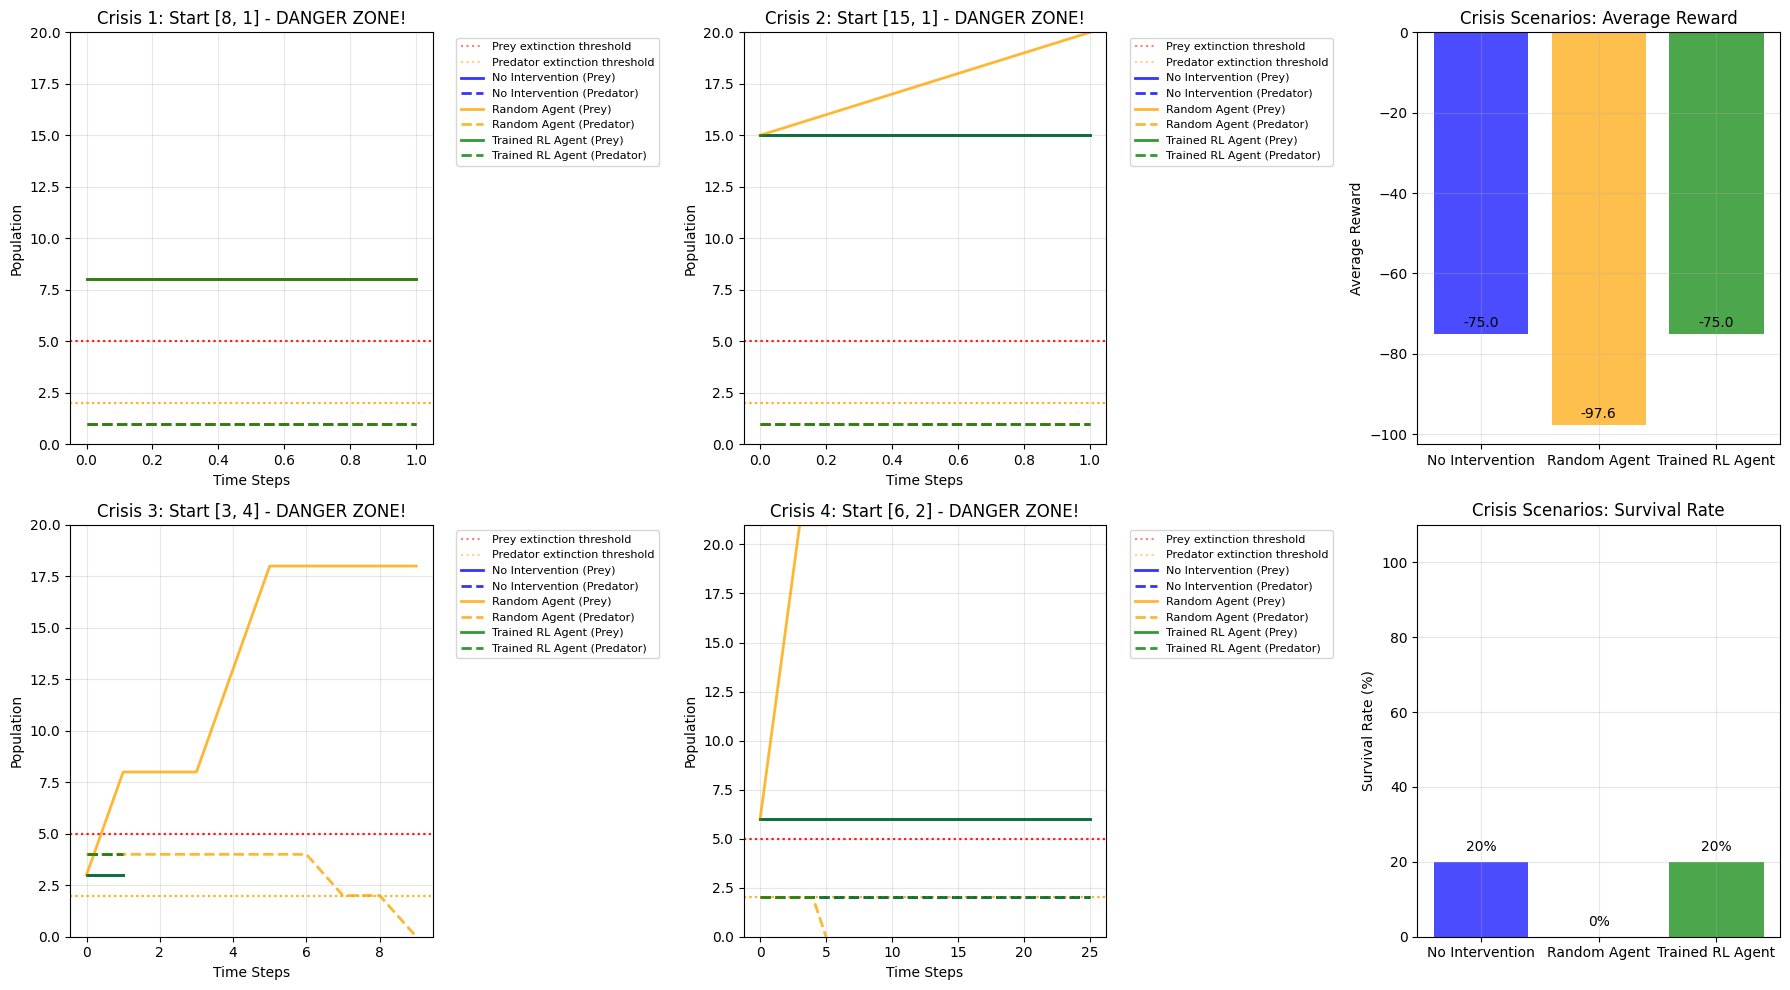


DETAILED CRISIS SCENARIOS ANALYSIS

Crisis 1 - Starting State: [8, 1] (CRITICAL!)
----------------------------------------------------------------------
Approach        Reward   Survival     Final State     Status    
----------------------------------------------------------------------
No Intervention -100     1/25         [8.0, 1.0]      EXTINCT ❌ 
Random Agent    -100     1/25         [8.0, 1.0]      EXTINCT ❌ 
Trained RL Agent -100     1/25         [8.0, 1.0]      EXTINCT ❌ 

Crisis 2 - Starting State: [15, 1] (CRITICAL!)
----------------------------------------------------------------------
Approach        Reward   Survival     Final State     Status    
----------------------------------------------------------------------
No Intervention -100     1/25         [15.0, 1.0]     EXTINCT ❌ 
Random Agent    -100     1/25         [20.0, 1.0]     EXTINCT ❌ 
Trained RL Agent -100     1/25         [15.0, 1.0]     EXTINCT ❌ 

Crisis 3 - Starting State: [3, 4] (CRITICAL!)
----------------

In [25]:
# Visualize crisis scenarios results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot crisis scenario trajectories (first 4 scenarios)
for i, result in enumerate(crisis_results[:4]):  # Show first 4 crisis scenarios
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    initial_state = result['initial_state']
    ax.set_title(f'Crisis {i+1}: Start [{initial_state[0]}, {initial_state[1]}] - DANGER ZONE!')
    
    for j, scenario_type in enumerate(scenario_types):
        trajectory = result['results'][scenario_type]['trajectory']
        prey_pop = [state[0] for state in trajectory]
        predator_pop = [state[1] for state in trajectory]
        
        # Add extinction thresholds as horizontal lines
        ax.axhline(y=5, color='red', linestyle=':', alpha=0.5, label='Prey extinction threshold' if j == 0 else "")
        ax.axhline(y=2, color='orange', linestyle=':', alpha=0.5, label='Predator extinction threshold' if j == 0 else "")
        
        ax.plot(prey_pop, label=f'{scenario_labels[j]} (Prey)', 
               color=colors[j], linestyle='-', alpha=0.8, linewidth=2)
        ax.plot(predator_pop, label=f'{scenario_labels[j]} (Predator)', 
               color=colors[j], linestyle='--', alpha=0.8, linewidth=2)
    
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Population')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, max(20, max([max(s[0] for s in result['results'][st]['trajectory']) for st in scenario_types])))

# Performance comparison for crisis scenarios
ax_crisis_rewards = axes[0, 2]
ax_crisis_survival = axes[1, 2]

# Crisis rewards comparison
crisis_reward_values = [crisis_rewards[scenario_type] / num_crisis_scenarios for scenario_type in scenario_types]
bars1 = ax_crisis_rewards.bar(scenario_labels, crisis_reward_values, color=colors, alpha=0.7)
ax_crisis_rewards.set_title('Crisis Scenarios: Average Reward')
ax_crisis_rewards.set_ylabel('Average Reward')
ax_crisis_rewards.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, crisis_reward_values):
    height = bar.get_height()
    ax_crisis_rewards.text(bar.get_x() + bar.get_width()/2., height + 1,
                          f'{value:.1f}', ha='center', va='bottom')

# Crisis survival rates
survival_rates = [(num_crisis_scenarios - crisis_extinctions[scenario_type]) / num_crisis_scenarios * 100 
                  for scenario_type in scenario_types]
bars2 = ax_crisis_survival.bar(scenario_labels, survival_rates, color=colors, alpha=0.7)
ax_crisis_survival.set_title('Crisis Scenarios: Survival Rate')
ax_crisis_survival.set_ylabel('Survival Rate (%)')
ax_crisis_survival.set_ylim(0, 110)
ax_crisis_survival.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, survival_rates):
    height = bar.get_height()
    ax_crisis_survival.text(bar.get_x() + bar.get_width()/2., height + 2,
                           f'{value:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed crisis analysis
print("\n" + "="*80)
print("DETAILED CRISIS SCENARIOS ANALYSIS")
print("="*80)

for i, result in enumerate(crisis_results):
    initial_state = result['initial_state']
    print(f"\nCrisis {i+1} - Starting State: [{initial_state[0]}, {initial_state[1]}] (CRITICAL!)")
    print("-" * 70)
    print(f"{'Approach':<15} {'Reward':<8} {'Survival':<12} {'Final State':<15} {'Status':<10}")
    print("-" * 70)
    
    for scenario_type in scenario_types:
        data = result['results'][scenario_type]
        final_state = data['final_state']
        survival_str = f"{data['survival_steps']}/{num_crisis_steps}"
        final_state_str = f"[{final_state[0]:.1f}, {final_state[1]:.1f}]"
        status = "SURVIVED ✅" if data['survival_steps'] == num_crisis_steps else "EXTINCT ❌"
        
        print(f"{scenario_labels[scenario_types.index(scenario_type)]:<15} "
              f"{data['total_reward']:<8} "
              f"{survival_str:<12} "
              f"{final_state_str:<15} "
              f"{status:<10}")

print("\n" + "="*80)
print("🔥 FINAL VERDICT: ACTIVE MANAGEMENT CAPABILITY")
print("="*80)

# Compare stable vs crisis performance
stable_rl_extinctions = extinction_count['rl_agent']
crisis_rl_extinctions = crisis_extinctions['rl_agent']

print(f"RL Agent Performance Summary:")
print(f"  Stable Scenarios:  {4-stable_rl_extinctions}/4 survived ({(4-stable_rl_extinctions)/4*100:.0f}%)")
print(f"  Crisis Scenarios:  {num_crisis_scenarios-crisis_rl_extinctions}/{num_crisis_scenarios} survived ({(num_crisis_scenarios-crisis_rl_extinctions)/num_crisis_scenarios*100:.0f}%)")
print()

if crisis_rl_extinctions < crisis_extinctions['no_intervention']:
    print("🎉 SUCCESS: RL agent shows ACTIVE MANAGEMENT - performs better than doing nothing in crisis!")
else:
    print("⚠️  RESULT: RL agent still too conservative - needs more challenging training scenarios")

print(f"\nRandom agent crisis survival: {(num_crisis_scenarios-crisis_extinctions['random_agent'])/num_crisis_scenarios*100:.0f}%")
print(f"No intervention crisis survival: {(num_crisis_scenarios-crisis_extinctions['no_intervention'])/num_crisis_scenarios*100:.0f}%")
print(f"RL agent crisis survival: {(num_crisis_scenarios-crisis_extinctions['rl_agent'])/num_crisis_scenarios*100:.0f}%")